In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('ex1data1.txt', delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size
#add a ones array to X, so that theta0 * x = theta0 * 1 = theta0
X = np.stack([np.ones(m), X], axis=1)

# initialize theta to [0, 0]
theta = np.zeros(2)

#gradient descent variables
iterations = 1500
alpha = 0.01



It's always better to plot your data before coding


In [2]:
def plotData(x, y, style):
    plt.plot(x, y, style, ms=10, mec='k')
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')
    

To apply gradient descent, we firstly need to create a cost functtion:


In [3]:
def computeCost(X, y, theta):
    #hypothesis
    H = np.dot(X, theta)
    S = np.sum(np.square(H - y))
    J = (1/(2 * m)) * S
    return J


Now that we have a cost function, we need to code a gradient descent:

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    theta = theta.copy()
    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot((np.dot(X, theta) - y), X)
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

Now we can apply gradient descent to our data and get right theta values: 

In [5]:
theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)

Finally, we can plot the given data, and our solution - linear regression

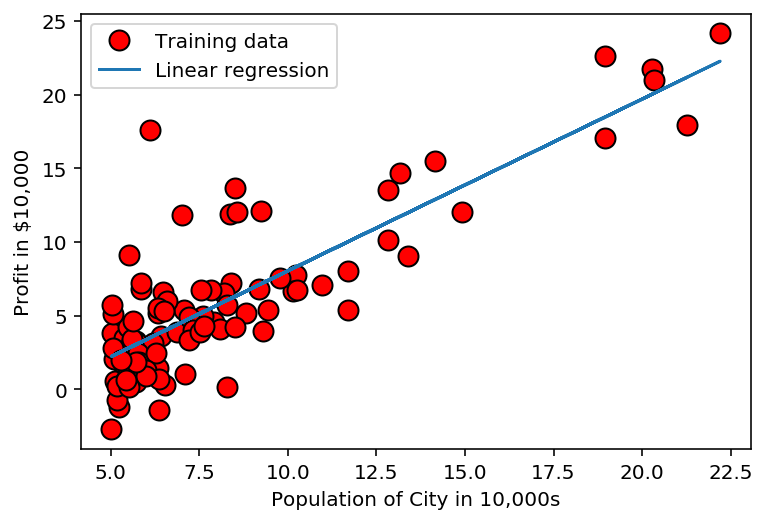

In [6]:
# open a new figure
fig = plt.figure()
#plot the given data
plotData(X[:, 1], y, 'ro')

#plot the linear regression
plotData(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);

plt.show()

And last but not least, lets make a predicton for a ciry with 35.000 population:

In [7]:
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of\n' + str((predict1 * 10000)))

For population = 35,000, we predict a profit of
4519.7678677017675
